<a href="https://colab.research.google.com/github/vaisiria/ml/blob/main/car_price_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model Performance:
Root Mean Squared Error (RMSE): 20599.29
R² Score: 0.99

   Actual Price  Predicted Price
0        700000     7.272215e+05
1        600000     5.828151e+05
2       1200000     1.215384e+06


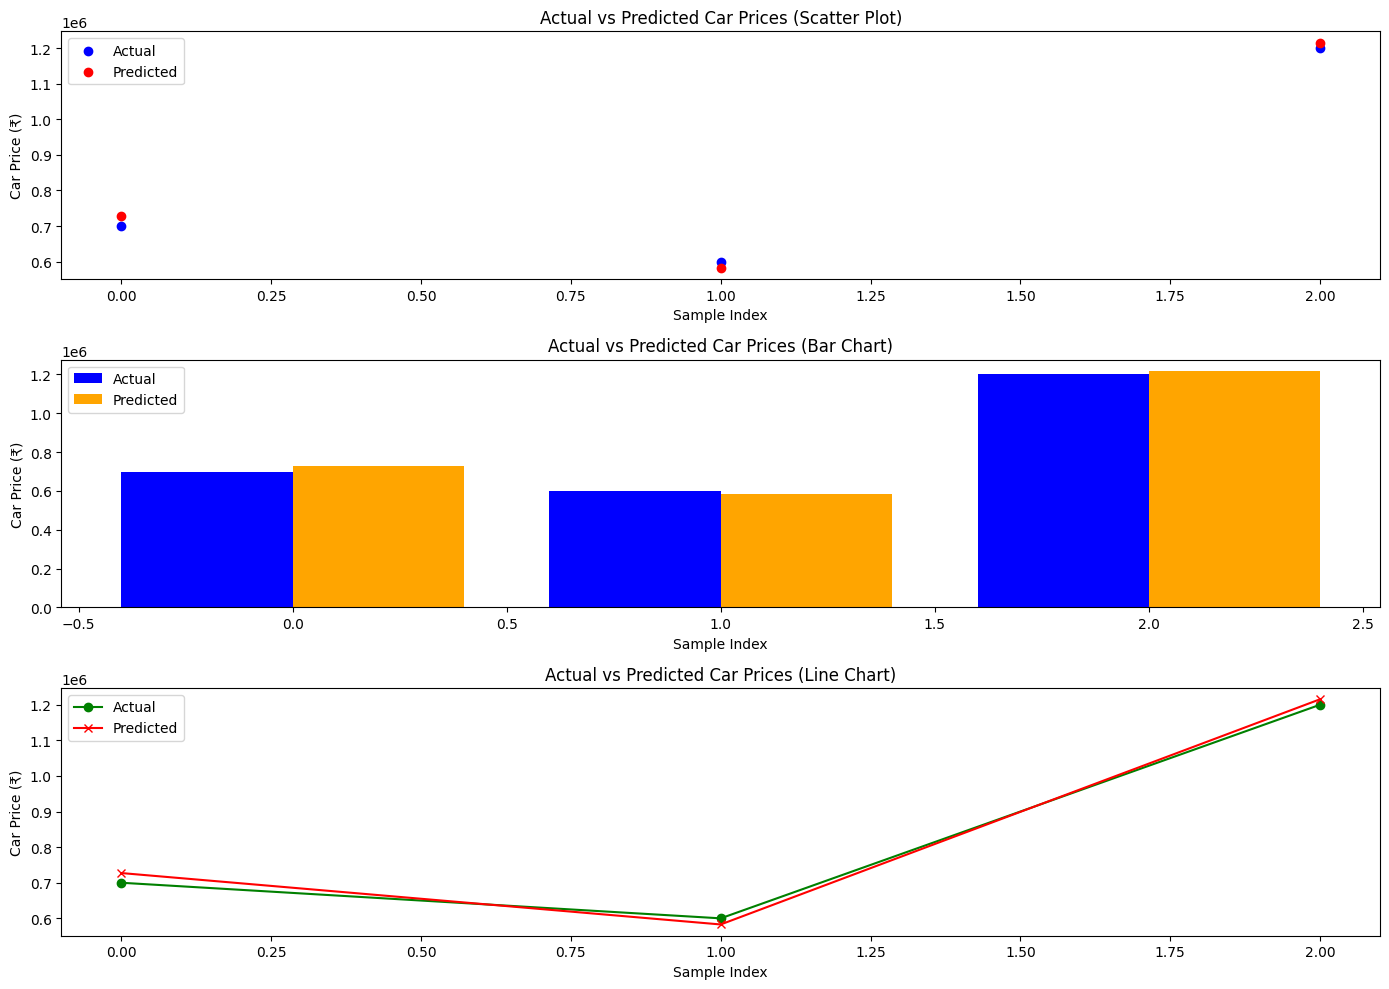

Predicted Price for new car: ₹854320.00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = {
    'Mileage': [5000, 12000, 18000, 25000, 32000, 40000, 52000, 60000, 72000, 85000, 94000, 105000, 118000, 130000, 145000],
    'Age': [1, 1, 2, 2, 3, 3, 4, 4, 5, 6, 6, 7, 8, 9, 10],
    'Horsepower': [200, 195, 185, 175, 170, 165, 160, 155, 150, 145, 140, 130, 125, 120, 110],
    'Price': [1200000, 1150000, 1100000, 1000000, 950000, 900000, 850000, 800000, 750000, 700000, 650000, 600000, 550000, 500000, 450000]
}

df = pd.DataFrame(data)
X = df[['Mileage', 'Age', 'Horsepower']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}\n")

results = pd.DataFrame({'Actual Price': y_test.values, 'Predicted Price': y_pred})
print(results)

plt.figure(figsize=(14,10))

plt.subplot(3,1,1)
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.title("Actual vs Predicted Car Prices (Scatter Plot)")
plt.xlabel("Sample Index")
plt.ylabel("Car Price (₹)")
plt.legend()

plt.subplot(3,1,2)
plt.bar(np.arange(len(y_test))-0.2, y_test, 0.4, label='Actual', color='blue')
plt.bar(np.arange(len(y_pred))+0.2, y_pred, 0.4, label='Predicted', color='orange')
plt.title("Actual vs Predicted Car Prices (Bar Chart)")
plt.xlabel("Sample Index")
plt.ylabel("Car Price (₹)")
plt.legend()

plt.subplot(3,1,3)
plt.plot(y_test.values, label='Actual', color='green', marker='o')
plt.plot(y_pred, label='Predicted', color='red', marker='x')
plt.title("Actual vs Predicted Car Prices (Line Chart)")
plt.xlabel("Sample Index")
plt.ylabel("Car Price (₹)")
plt.legend()

plt.tight_layout()
plt.show()

new_car = pd.DataFrame({'Mileage': [55000], 'Age': [3], 'Horsepower': [165]})
predicted_price = model.predict(new_car)
print(f"Predicted Price for new car: ₹{predicted_price[0]:.2f}")
